In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    

rank = 10
rng = np.arange(0, rank) + 1
ticks = np.arange(0, (len(rng) + 1), 1)

def get_avg(fpr_val, tpr_val):
    range_eval = np.arange(0, 1, 1e-6)
    # total_fpr = np.empty((0, range_eval.shape[0]), int)
    total_tpr = np.empty((0, range_eval.shape[0]), int)
    
    for ds in fpr_val:
        interp_y = np.interp(range_eval, fpr_val[ds], tpr_val[ds])
        total_tpr = np.append(total_tpr, np.array([interp_y]), axis=0)
    avg_tpr = np.mean(total_tpr, axis=0)

    return range_eval, avg_tpr

In [2]:
# Ours (Stolen)
peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/peri/peri_eer_dict.pt')
peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/peri/peri_fpr_dict.pt')
peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/peri/peri_tpr_dict.pt')
peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/peri/peri_auc_dict.pt')
face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/face/face_eer_dict.pt')
face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/face/face_fpr_dict.pt')
face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/face/face_tpr_dict.pt')
face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/face/face_auc_dict.pt')
cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/cm/cm_eer_dict.pt')
cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/cm/cm_fpr_dict.pt')
cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/cm/cm_tpr_dict.pt')
cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_Stolen/cm/cm_auc_dict.pt')

# Ours (User)
ours_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/peri/peri_eer_dict.pt')
ours_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/peri/peri_fpr_dict.pt')
ours_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/peri/peri_tpr_dict.pt')
ours_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/peri/peri_auc_dict.pt')
ours_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/face/face_eer_dict.pt')
ours_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/face/face_fpr_dict.pt')
ours_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/face/face_tpr_dict.pt')
ours_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/face/face_auc_dict.pt')
ours_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/cm/cm_eer_dict.pt')
ours_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/cm/cm_fpr_dict.pt')
ours_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/cm/cm_tpr_dict.pt')
ours_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_User/cm/cm_auc_dict.pt')

# Ours (Non-Hash)
ours_nohash_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/peri/peri_eer_dict.pt')
ours_nohash_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/peri/peri_fpr_dict.pt')
ours_nohash_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/peri/peri_tpr_dict.pt')
ours_nohash_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/peri/peri_auc_dict.pt')
ours_nohash_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/face/face_eer_dict.pt')
ours_nohash_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/face/face_fpr_dict.pt')
ours_nohash_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/face/face_tpr_dict.pt')
ours_nohash_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/face/face_auc_dict.pt')
ours_nohash_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/cm/cm_eer_dict.pt')
ours_nohash_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/cm/cm_fpr_dict.pt')
ours_nohash_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/cm/cm_tpr_dict.pt')
ours_nohash_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/Ours_Main_NoHash/cm/cm_auc_dict.pt')

# CMB-Net
cb_net_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_peri/peri_eer_dict.pt')
cb_net_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_peri/peri_fpr_dict.pt')
cb_net_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_peri/peri_tpr_dict.pt')
cb_net_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_peri/peri_auc_dict.pt')
cb_net_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_face/face_eer_dict.pt')
cb_net_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_face/face_fpr_dict.pt')
cb_net_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_face/face_tpr_dict.pt')
cb_net_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/intra_face/face_auc_dict.pt')
cb_net_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/inter_peri-face/cm_eer_dict.pt')
cb_net_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/inter_peri-face/cm_fpr_dict.pt')
cb_net_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/inter_peri-face/cm_tpr_dict.pt')
cb_net_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/cb_net/inter_peri-face/cm_auc_dict.pt')

# HA-ViT
ha_vit_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_peri/peri_eer_dict.pt')
ha_vit_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_peri/peri_fpr_dict.pt')
ha_vit_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_peri/peri_tpr_dict.pt')
ha_vit_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_peri/peri_auc_dict.pt')
ha_vit_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_face/face_eer_dict.pt')
ha_vit_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_face/face_fpr_dict.pt')
ha_vit_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_face/face_tpr_dict.pt')
ha_vit_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/intra_face/face_auc_dict.pt')
ha_vit_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/inter_peri-face/cm_eer_dict.pt')
ha_vit_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/inter_peri-face/cm_fpr_dict.pt')
ha_vit_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/inter_peri-face/cm_tpr_dict.pt')
ha_vit_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/ha_vit/inter_peri-face/cm_auc_dict.pt')

# GC2SA-Net
gc2sa_net_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_peri/peri_eer_dict.pt')
gc2sa_net_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_peri/peri_fpr_dict.pt')
gc2sa_net_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_peri/peri_tpr_dict.pt')
gc2sa_net_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_peri/peri_auc_dict.pt')
gc2sa_net_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_face/face_eer_dict.pt')
gc2sa_net_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_face/face_fpr_dict.pt')
gc2sa_net_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_face/face_tpr_dict.pt')
gc2sa_net_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/intra_face/face_auc_dict.pt')
gc2sa_net_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/inter_peri-face/cm_eer_dict.pt')
gc2sa_net_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/inter_peri-face/cm_fpr_dict.pt')
gc2sa_net_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/inter_peri-face/cm_tpr_dict.pt')
gc2sa_net_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/gc2sa_net/inter_peri-face/cm_auc_dict.pt')

# MFA-ViT
mfa_vit_peri_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/peri/peri_eer_dict.pt')
mfa_vit_peri_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/peri/peri_fpr_dict.pt')
mfa_vit_peri_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/peri/peri_tpr_dict.pt')
mfa_vit_peri_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/peri/peri_auc_dict.pt')
mfa_vit_face_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/face/face_eer_dict.pt')
mfa_vit_face_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/face/face_fpr_dict.pt')
mfa_vit_face_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/face/face_tpr_dict.pt')
mfa_vit_face_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/face/face_auc_dict.pt')
mfa_vit_cm_eer_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/cm/cm_eer_dict.pt')
mfa_vit_cm_fpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/cm/cm_fpr_dict.pt')
mfa_vit_cm_tpr_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/cm/cm_tpr_dict.pt')
mfa_vit_cm_auc_dict = torch.load('/home/tiongsik/Python/fsb_hashnet/data/roc/MFA_ViT/cm/cm_auc_dict.pt')

In [3]:
peri_avg, face_avg, cm_avg = [], [], []
ours_peri_avg, ours_face_avg, ours_cm_avg = [], [], []
ours_nohash_peri_avg, ours_nohash_face_avg, ours_nohash_cm_avg = [], [], []
cb_net_peri_avg, cb_net_face_avg, cb_net_cm_avg = [], [], []
ha_vit_peri_avg, ha_vit_face_avg, ha_vit_cm_avg = [], [], []
gc2sa_net_peri_avg, gc2sa_net_face_avg, gc2sa_net_cm_avg = [], [], []
mfa_vit_peri_avg, mfa_vit_face_avg, mfa_vit_cm_avg = [], [], []

for ds_ in peri_auc_dict:
    peri_avg.append(peri_auc_dict[ds_])
    face_avg.append(face_auc_dict[ds_])
    cm_avg.append(cm_auc_dict[ds_])
	
    ours_peri_avg.append(ours_peri_auc_dict[ds_])
    ours_face_avg.append(ours_face_auc_dict[ds_])
    ours_cm_avg.append(ours_cm_auc_dict[ds_])

    ours_nohash_peri_avg.append(ours_nohash_peri_auc_dict[ds_])
    ours_nohash_face_avg.append(ours_nohash_face_auc_dict[ds_])
    ours_nohash_cm_avg.append(ours_nohash_cm_auc_dict[ds_])

    cb_net_peri_avg.append(cb_net_peri_auc_dict[ds_])
    cb_net_face_avg.append(cb_net_face_auc_dict[ds_])
    cb_net_cm_avg.append(cb_net_cm_auc_dict[ds_])

    ha_vit_peri_avg.append(ha_vit_peri_auc_dict[ds_])
    ha_vit_face_avg.append(ha_vit_face_auc_dict[ds_])
    ha_vit_cm_avg.append(ha_vit_cm_auc_dict[ds_])

    gc2sa_net_peri_avg.append(gc2sa_net_peri_auc_dict[ds_])
    gc2sa_net_face_avg.append(gc2sa_net_face_auc_dict[ds_])
    gc2sa_net_cm_avg.append(gc2sa_net_cm_auc_dict[ds_])

    mfa_vit_peri_avg.append(mfa_vit_peri_auc_dict[ds_])
    mfa_vit_face_avg.append(mfa_vit_face_auc_dict[ds_])
    mfa_vit_cm_avg.append(mfa_vit_cm_auc_dict[ds_])


########

peri_avg = np.mean(np.array(peri_avg), 0)
face_avg = np.mean(np.array(face_avg), 0)
cm_avg = np.mean(np.array(cm_avg), 0)

ours_peri_avg = np.mean(np.array(ours_peri_avg), 0)
ours_face_avg = np.mean(np.array(ours_face_avg), 0)
ours_cm_avg = np.mean(np.array(ours_cm_avg), 0)

ours_nohash_peri_avg = np.mean(np.array(ours_nohash_peri_avg), 0)
ours_nohash_face_avg = np.mean(np.array(ours_nohash_face_avg), 0)
ours_nohash_cm_avg = np.mean(np.array(ours_nohash_cm_avg), 0)

cb_net_peri_avg = np.mean(np.array(cb_net_peri_avg), 0)
cb_net_face_avg = np.mean(np.array(cb_net_face_avg), 0)
cb_net_cm_avg = np.mean(np.array(cb_net_cm_avg), 0)

ha_vit_peri_avg = np.mean(np.array(ha_vit_peri_avg), 0)
ha_vit_face_avg = np.mean(np.array(ha_vit_face_avg), 0)
ha_vit_cm_avg = np.mean(np.array(ha_vit_cm_avg), 0)

gc2sa_net_peri_avg = np.mean(np.array(gc2sa_net_peri_avg), 0)
gc2sa_net_face_avg = np.mean(np.array(gc2sa_net_face_avg), 0)
gc2sa_net_cm_avg = np.mean(np.array(gc2sa_net_cm_avg), 0)

mfa_vit_peri_avg = np.mean(np.array(mfa_vit_peri_avg), 0)
mfa_vit_face_avg = np.mean(np.array(mfa_vit_face_avg), 0)
mfa_vit_cm_avg = np.mean(np.array(mfa_vit_cm_avg), 0)


########

range_, peri_tpr = get_avg(peri_fpr_dict, peri_tpr_dict)
range_, face_tpr = get_avg(face_fpr_dict, face_tpr_dict)
range_, cm_tpr = get_avg(cm_fpr_dict, cm_tpr_dict)

range_, ours_peri_tpr = get_avg(ours_peri_fpr_dict, ours_peri_tpr_dict)
range_, ours_face_tpr = get_avg(ours_face_fpr_dict, ours_face_tpr_dict)
range_, ours_cm_tpr = get_avg(ours_cm_fpr_dict, ours_cm_tpr_dict)

range_, ours_nohash_peri_tpr = get_avg(ours_nohash_peri_fpr_dict, ours_nohash_peri_tpr_dict)
range_, ours_nohash_face_tpr = get_avg(ours_nohash_face_fpr_dict, ours_nohash_face_tpr_dict)
range_, ours_nohash_cm_tpr = get_avg(ours_nohash_cm_fpr_dict, ours_nohash_cm_tpr_dict)

range_, cb_net_peri_tpr = get_avg(cb_net_peri_fpr_dict, cb_net_peri_tpr_dict)
range_, cb_net_face_tpr = get_avg(cb_net_face_fpr_dict, cb_net_face_tpr_dict)
range_, cb_net_cm_tpr = get_avg(cb_net_cm_fpr_dict, cb_net_cm_tpr_dict)

range_, ha_vit_peri_tpr = get_avg(ha_vit_peri_fpr_dict, ha_vit_peri_tpr_dict)
range_, ha_vit_face_tpr = get_avg(ha_vit_face_fpr_dict, ha_vit_face_tpr_dict)
range_, ha_vit_cm_tpr = get_avg(ha_vit_cm_fpr_dict, ha_vit_cm_tpr_dict)

range_, gc2sa_net_peri_tpr = get_avg(gc2sa_net_peri_fpr_dict, gc2sa_net_peri_tpr_dict)
range_, gc2sa_net_face_tpr = get_avg(gc2sa_net_face_fpr_dict, gc2sa_net_face_tpr_dict)
range_, gc2sa_net_cm_tpr = get_avg(gc2sa_net_cm_fpr_dict, gc2sa_net_cm_tpr_dict)

range_, mfa_vit_peri_tpr = get_avg(mfa_vit_peri_fpr_dict, mfa_vit_peri_tpr_dict)
range_, mfa_vit_face_tpr = get_avg(mfa_vit_face_fpr_dict, mfa_vit_face_tpr_dict)
range_, mfa_vit_cm_tpr = get_avg(mfa_vit_cm_fpr_dict, mfa_vit_cm_tpr_dict)


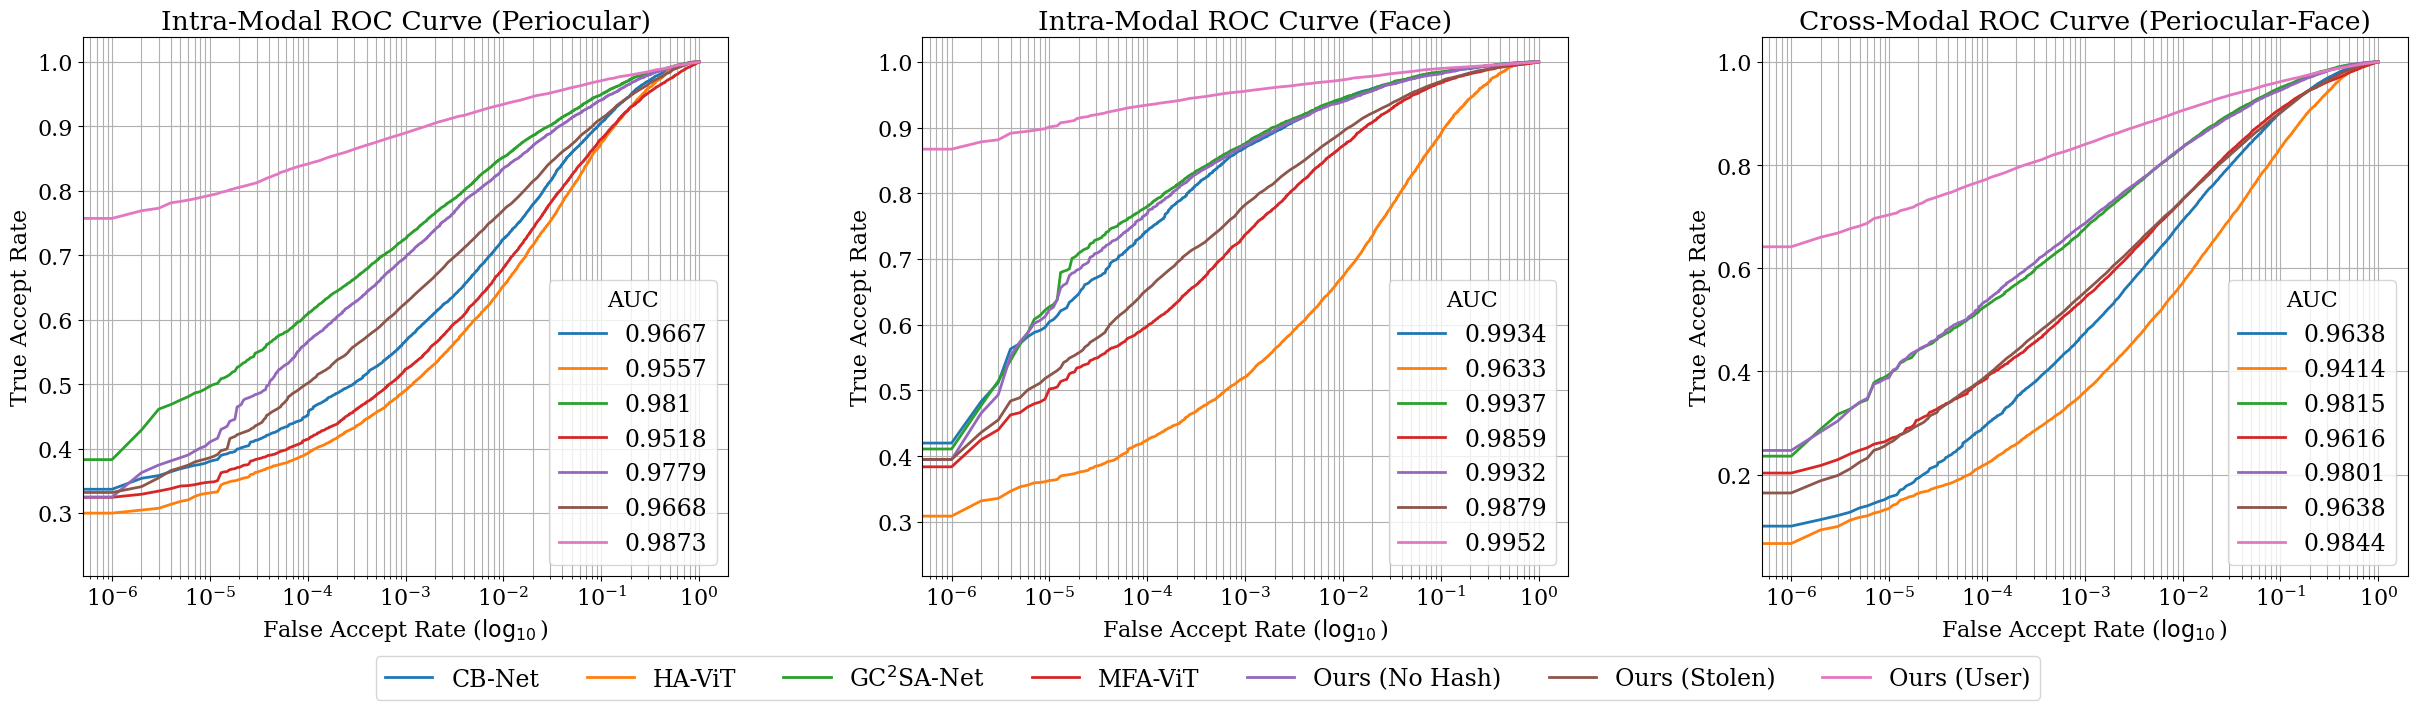

<Figure size 640x480 with 0 Axes>

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16, 'legend.fontsize': 17})    

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(7)
fig.set_figwidth(30)
plt.subplots_adjust(wspace=0.3)

# Intra-Modal CMC Curve
axs[0].grid(which='both')
axs[0].set_title('Intra-Modal ROC Curve (Periocular)')
axs[0].set_ylabel('True Accept Rate')
axs[0].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[0].semilogx(base=10)
cb_net_peri_roc, = axs[0].plot(range_, cb_net_peri_tpr, label=str(round(cb_net_peri_avg, 4)), linewidth=2)
ha_vit_peri_roc, = axs[0].plot(range_, ha_vit_peri_tpr, label=str(round(ha_vit_peri_avg, 4)), linewidth=2)
gc2sa_net_peri_roc, = axs[0].plot(range_, gc2sa_net_peri_tpr, label=str(round(gc2sa_net_peri_avg, 4)), linewidth=2)
mfa_vit_peri_roc, = axs[0].plot(range_, mfa_vit_peri_tpr, label=str(round(mfa_vit_peri_avg, 4)), linewidth=2)
ours_nohash_peri_roc, = axs[0].plot(range_, ours_nohash_peri_tpr, label=str(round(ours_nohash_peri_avg, 4)), linewidth=2)
peri_roc, = axs[0].plot(range_, peri_tpr, label=str(round(peri_avg, 4)), linewidth=2)
ours_peri_roc, = axs[0].plot(range_, ours_peri_tpr, label=str(round(ours_peri_avg, 4)), linewidth=2)
axs[0].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Inter-Modal CMC Curve
axs[1].grid(which='both')
axs[1].set_title('Intra-Modal ROC Curve (Face)')
axs[1].set_ylabel('True Accept Rate')
axs[1].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[1].semilogx(base=10)
cb_net_face_roc, = axs[1].plot(range_, cb_net_face_tpr, label=str(round(cb_net_face_avg, 4)), linewidth=2)
ha_vit_face_roc, = axs[1].plot(range_, ha_vit_face_tpr, label=str(round(ha_vit_face_avg, 4)), linewidth=2)
gc2sa_net_face_roc, = axs[1].plot(range_, gc2sa_net_face_tpr, label=str(round(gc2sa_net_face_avg, 4)), linewidth=2)
mfa_vit_face_roc, = axs[1].plot(range_, mfa_vit_face_tpr, label=str(round(mfa_vit_face_avg, 4)), linewidth=2)
ours_nohash_face_roc, = axs[1].plot(range_, ours_nohash_face_tpr, label=str(round(ours_nohash_face_avg, 4)), linewidth=2)
face_roc, = axs[1].plot(range_, face_tpr, label=str(round(face_avg, 4)), linewidth=2)
ours_face_roc, = axs[1].plot(range_, ours_face_tpr, label=str(round(ours_face_avg, 4)), linewidth=2)
axs[1].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Intra-Modal ROC Curve
axs[2].grid(which='both')
axs[2].set_title('Cross-Modal ROC Curve (Periocular-Face)')
axs[2].set_ylabel('True Accept Rate')
axs[2].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[2].semilogx(base=10)
cb_net_cm_roc, = axs[2].plot(range_, cb_net_cm_tpr, label=str(round(cb_net_cm_avg, 4)), linewidth=2)
ha_vit_cm_roc, = axs[2].plot(range_, ha_vit_cm_tpr, label=str(round(ha_vit_cm_avg, 4)), linewidth=2)
gc2sa_net_cm_roc, = axs[2].plot(range_, gc2sa_net_cm_tpr, label=str(round(gc2sa_net_cm_avg, 4)), linewidth=2)
mfa_vit_cm_roc, = axs[2].plot(range_, mfa_vit_cm_tpr, label=str(round(mfa_vit_cm_avg, 4)), linewidth=2)
ours_nohash_cm_roc, = axs[2].plot(range_, ours_nohash_cm_tpr, label=str(round(ours_nohash_cm_avg, 4)), linewidth=2)
cm_roc, = axs[2].plot(range_, cm_tpr, label=str(round(cm_avg, 4)), linewidth=2)
ours_cm_roc, = axs[2].plot(range_, ours_cm_tpr, label=str(round(ours_cm_avg, 4)), linewidth=2)
axs[2].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Legends
line_labels = ["CB-Net", "HA-ViT", "GC$^2$SA-Net", "MFA-ViT", "Ours (No Hash)", "Ours (Stolen)", "Ours (User)"]

fig.legend( handles=[cb_net_cm_roc, ha_vit_cm_roc, gc2sa_net_cm_roc, mfa_vit_cm_roc, ours_nohash_cm_roc, cm_roc, ours_cm_roc],
            labels=line_labels,   # The labels for each line
            loc="lower center",
            bbox_to_anchor=(0.5, -0.07),
            ncol=7,    # Position of legend
            borderaxespad=0.1)

plt.savefig('../graphs/ROC_sota.pdf', bbox_inches='tight')
plt.show()
plt.clf()